# Real Estate Price Prediction using EDA
Predict future real estate prices using regression models

**Dataset Sources:** UCI Machine Learning Repository, Kaggle from: https://www.kaggle.com/datasets/camnugent/california-housing-prices

## 1. Import Required Libraries

In [99]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## 2. Loading Dataset
Using California Housing Dataset. This dataset contains real data from Kaggle https://www.kaggle.com/datasets/camnugent/california-housing-prices, but it could also be imported through Python Library. The dataset is built into scikit-learn so I can import it directly without downloading it.

longitude: House block longitude

latitude: House block longitude

housing_median_age: Median house age in block

total_rooms: Total number of rooms

total_bedrooms: Total number of bedrooms

population: Block population

households: House occupancy

median_income: Median income in block

median_house_value: Median house value

ocean_proximity: How close the property is to the ocean

In [100]:
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing()

df = pd.DataFrame(data=housing_data.data, columns=housing_data.feature_names)

df['MedHouseVal'] = housing_data.target

df.columns = ['median_income', 'house_age', 'avg_rooms', 'avg_bedrooms', 'population', 'avg_occupancy', 'latitude', 'longitude', 'price']

df['price'] = df['price'] * 100000 

df['rooms_per_household'] = df['avg_rooms'] / df['avg_occupancy']
df['bedrooms_per_room'] = df['avg_bedrooms'] / df['avg_rooms']

print("Dataset shape: " + str(df.shape))
print("Number of properties: " + "{:,}".format(len(df)))


Dataset shape: (20640, 11)
Number of properties: 20,640


## 3. Data Exploration

In [101]:
print("Firt 5 rows of the dataset")
df.head()

Firt 5 rows of the dataset


,median_income,house_age,avg_rooms,avg_bedrooms,population,avg_occupancy,latitude,longitude,price,rooms_per_household,bedrooms_per_room
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0,2.732919,0.146591
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0,2.956685,0.155797
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0,2.957661,0.129516
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0,2.283154,0.184458
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0,2.879646,0.172096


In [102]:
print("Dataset Information")
df.info()

Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   median_income        20640 non-null  float64
 1   house_age            20640 non-null  float64
 2   avg_rooms            20640 non-null  float64
 3   avg_bedrooms         20640 non-null  float64
 4   population           20640 non-null  float64
 5   avg_occupancy        20640 non-null  float64
 6   latitude             20640 non-null  float64
 7   longitude            20640 non-null  float64
 8   price                20640 non-null  float64
 9   rooms_per_household  20640 non-null  float64
 10  bedrooms_per_room    20640 non-null  float64
dtypes: float64(11)
memory usage: 1.7 MB


In [103]:
print("Statistic sumamry of the dataset")
df.describe()

Statistic sumamry of the dataset


,median_income,house_age,avg_rooms,avg_bedrooms,population,avg_occupancy,latitude,longitude,price,rooms_per_household,bedrooms_per_room
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,206855.816909,1.976970,0.213075
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,115395.615874,1.146020,0.058023
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,14999.000000,0.002547,0.100000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,119600.000000,1.522382,0.175426
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,179700.000000,1.937936,0.203181
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,264725.000000,2.296090,0.239834
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,500001.000000,55.222222,1.000000


## 4. Exploratory Data Analysis (EDA)

### Price Distribution

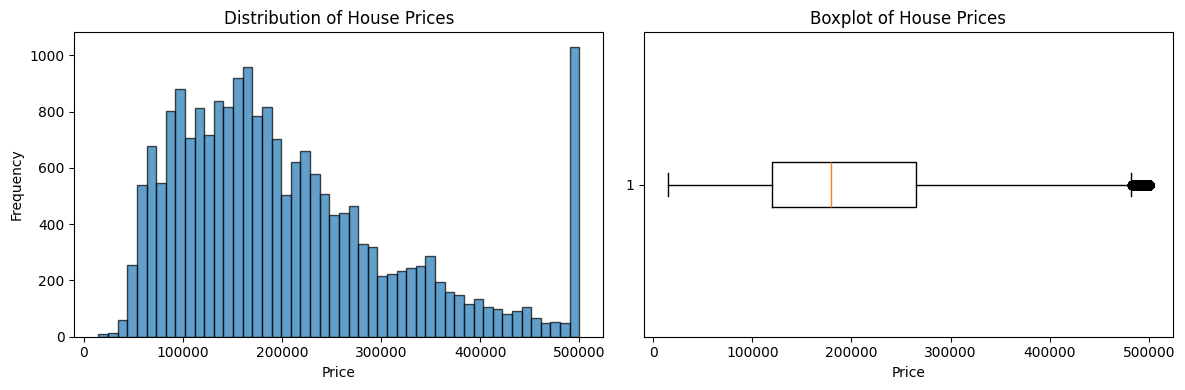

Mean Price: $206,855.82
Median Price: $179,700.00


In [104]:
# Plot price distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')

plt.subplot(1, 2, 2)
plt.boxplot(df['price'], vert=False)
plt.xlabel('Price')
plt.title('Boxplot of House Prices')

plt.tight_layout()
plt.show()

print("Mean Price: $" + "{:,.2f}".format(df['price'].mean()))
print("Median Price: $" + "{:,.2f}".format(df['price'].median()))

In [105]:
# Check the price distribution
print("Price statistics:")
print("Min: ${:,.2f}".format(df['price'].min()))
print("Max: ${:,.2f}".format(df['price'].max()))
print("Count of prices at max value: {}".format((df['price'] == df['price'].max()).sum()))


Price statistics:
Min: $14,999.00
Max: $500,001.00
Count of prices at max value: 965


### Correlation Analysis

In [106]:
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

print("\nFeatures correlation with Price:")
print(correlation_matrix['price'].sort_values(ascending=False))


Features correlation with Price:
price                  1.000000
median_income          0.688075
rooms_per_household    0.209482
avg_rooms              0.151948
house_age              0.105623
avg_occupancy         -0.023737
population            -0.024650
longitude             -0.045967
avg_bedrooms          -0.046701
latitude              -0.144160
bedrooms_per_room     -0.255624
Name: price, dtype: float64


### Feature Relationships with Price

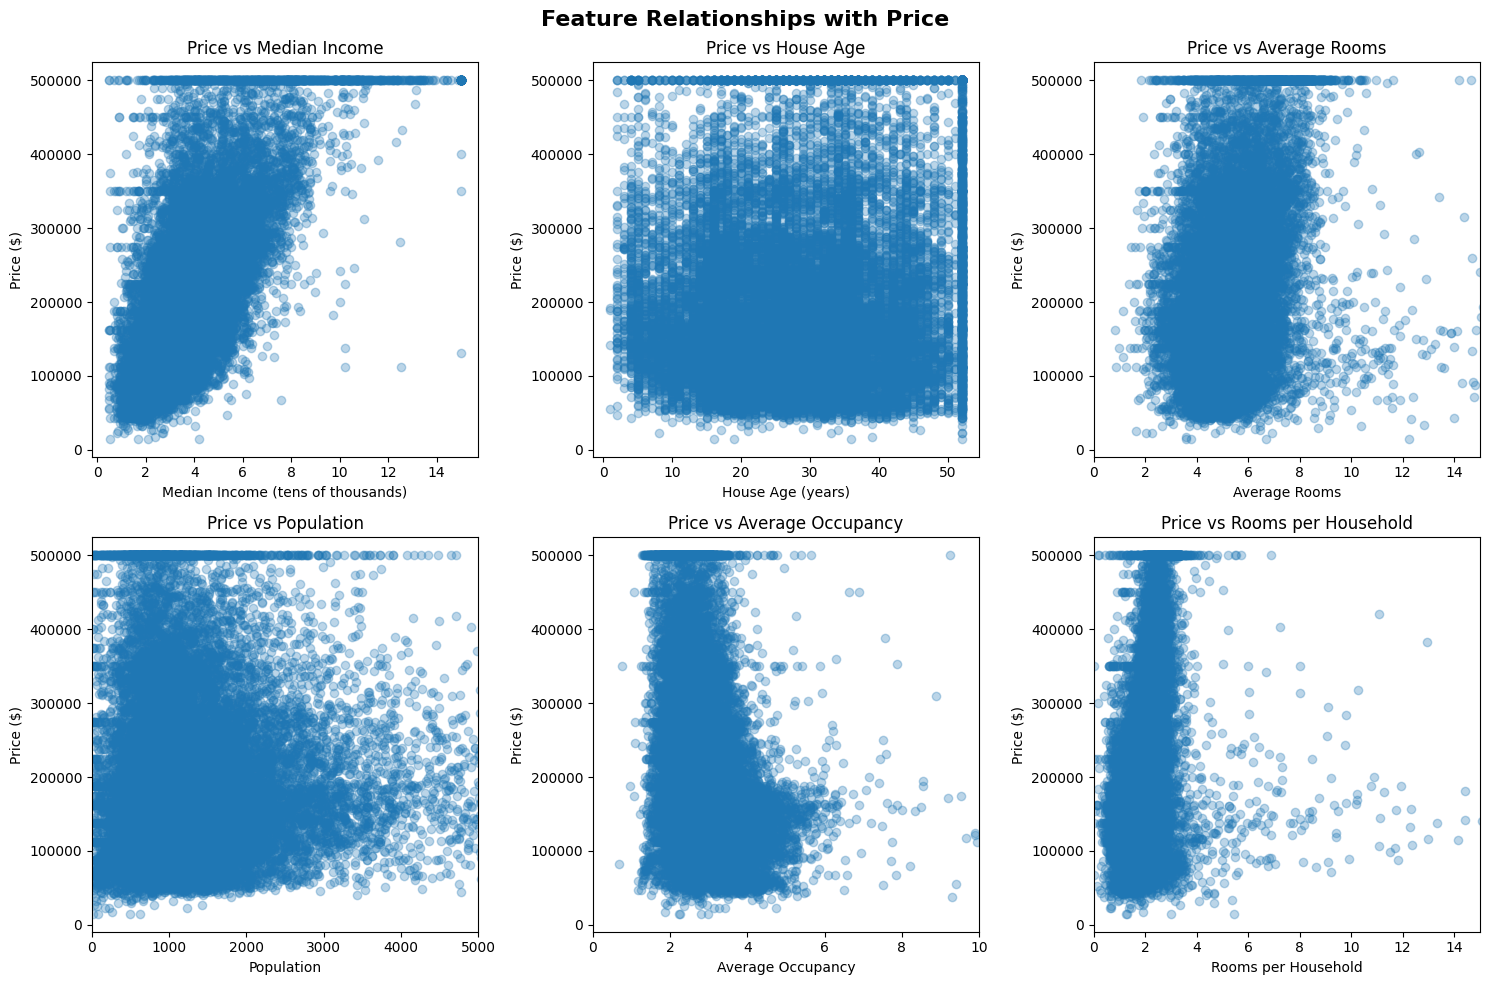

In [107]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Feature Relationships with Price', fontsize=16, fontweight='bold')

axes[0, 0].scatter(df['median_income'], df['price'], alpha=0.3)
axes[0, 0].set_xlabel('Median Income (tens of thousands)')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].set_title('Price vs Median Income')

axes[0, 1].scatter(df['house_age'], df['price'], alpha=0.3)
axes[0, 1].set_xlabel('House Age (years)')
axes[0, 1].set_ylabel('Price ($)')
axes[0, 1].set_title('Price vs House Age')

axes[0, 2].scatter(df['avg_rooms'], df['price'], alpha=0.3)
axes[0, 2].set_xlabel('Average Rooms')
axes[0, 2].set_ylabel('Price ($)')
axes[0, 2].set_title('Price vs Average Rooms')
axes[0, 2].set_xlim(0, 15)

axes[1, 0].scatter(df['population'], df['price'], alpha=0.3)
axes[1, 0].set_xlabel('Population')
axes[1, 0].set_ylabel('Price ($)')
axes[1, 0].set_title('Price vs Population')
axes[1, 0].set_xlim(0, 5000)

axes[1, 1].scatter(df['avg_occupancy'], df['price'], alpha=0.3)
axes[1, 1].set_xlabel('Average Occupancy')
axes[1, 1].set_ylabel('Price ($)')
axes[1, 1].set_title('Price vs Average Occupancy')
axes[1, 1].set_xlim(0, 10)

axes[1, 2].scatter(df['rooms_per_household'], df['price'], alpha=0.3)
axes[1, 2].set_xlabel('Rooms per Household')
axes[1, 2].set_ylabel('Price ($)')
axes[1, 2].set_title('Price vs Rooms per Household')
axes[1, 2].set_xlim(0, 15)

plt.tight_layout()
plt.show()

### Geographical Distribution (Prices by Location in California)

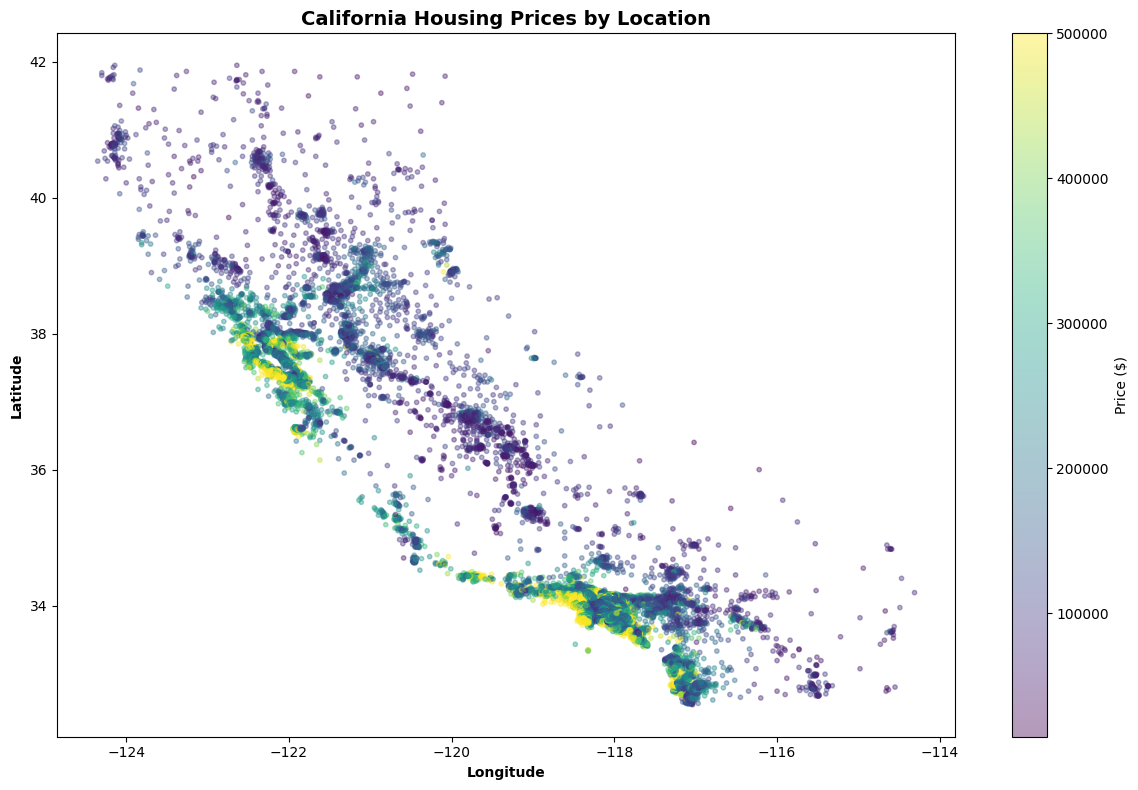

In [108]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['longitude'], df['latitude'], 
                     c=df['price'], s=10, alpha=0.4, 
                     cmap='viridis')
plt.colorbar(scatter, label='Price ($)')
plt.xlabel('Longitude', fontweight='bold')
plt.ylabel('Latitude', fontweight='bold')
plt.title('California Housing Prices by Location', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 5. Data Preprocessing

### Handle Outliers and Check for Missing Values

In [109]:
print("Removing censored data (capped at $500,001)")
print("Current max price: ${:,.2f}".format(df['price'].max()))
max_price = df['price'].max()
print("Properties at max price: {:,}".format((df['price'] == max_price).sum()))
df_no_cap = df[df['price'] < max_price].copy()
print("Removed {:,} censored properties".format(len(df) - len(df_no_cap)))

print("\nRemoving outliers using IQR method")
outlier_features = ['avg_occupancy', 'avg_rooms', 'rooms_per_household', 'bedrooms_per_room']

df_clean = df_no_cap.copy()
for col in outlier_features:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    before = len(df_clean)
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    removed = before - len(df_clean)
    if removed > 0:
        print("  {}: removed {:,} outliers".format(col, removed))

print("\nAfter removing Outliers:")
print("Original dataset: {:,} properties".format(len(df)))
print("After cleaning: {:,} properties".format(len(df_clean)))
print("Total removed: {:,} ({:.1f}%)".format(len(df) - len(df_clean), (len(df) - len(df_clean))/len(df)*100))

df = df_clean

Removing censored data (capped at $500,001)
Current max price: $500,001.00
Properties at max price: 965
Removed 965 censored properties

Removing outliers using IQR method
  avg_occupancy: removed 662 outliers
  avg_rooms: removed 443 outliers
  rooms_per_household: removed 146 outliers
  bedrooms_per_room: removed 508 outliers

After removing Outliers:
Original dataset: 20,640 properties
After cleaning: 17,916 properties
Total removed: 2,724 (13.2%)


### Feature Selection & Target Variable
Separate features (X) and target (y)


In [110]:
X = df.drop('price', axis=1)
y = df['price']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature columns:")
print(X.columns.tolist())

Features shape: (17916, 10)
Target shape: (17916,)

Feature columns:
['median_income', 'house_age', 'avg_rooms', 'avg_bedrooms', 'population', 'avg_occupancy', 'latitude', 'longitude', 'rooms_per_household', 'bedrooms_per_room']


### Train-Test Split
Split data into training and testing sets (80-20 split)


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])
print("\nTrain-Test split: " + "{:.1f}".format(len(X_train)/len(X)*100) + "% - " + "{:.1f}".format(len(X_test)/len(X)*100) + "%")

Training set size: 14332
Testing set size: 3584

Train-Test split: 80.0% - 20.0%


### Data Normalization/Standardization
Scaling features to have mean and standard deviation

In [112]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("  Min: " + "{:.2f}".format(X_train['median_income'].min()) + ", Max: " + "{:.2f}".format(X_train['median_income'].max()))
print("  Mean: " + "{:.2f}".format(X_train_scaled[:, 0].mean()) + ", Std: " + "{:.2f}".format(X_train_scaled[:, 0].std()))

  Min: 0.50, Max: 13.11
  Mean: 0.00, Std: 1.00


## 6. Model Building & Training
Linear Regression Model

In [114]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate model
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression Model:")
print("  RMSE: $" + "{:,.2f}".format(lr_rmse))
print("  MAE: $" + "{:,.2f}".format(lr_mae))
print("  R² Score: " + "{:.4f}".format(lr_r2))
print("\nModel explains " + "{:.2f}".format(lr_r2*100) + "% of the variance in price")

Linear Regression Model:
  RMSE: $55,883.96
  MAE: $42,111.14
  R² Score: 0.6681

Model explains 66.81% of the variance in price


## 7. Feature Coefficients in Linear Regression 

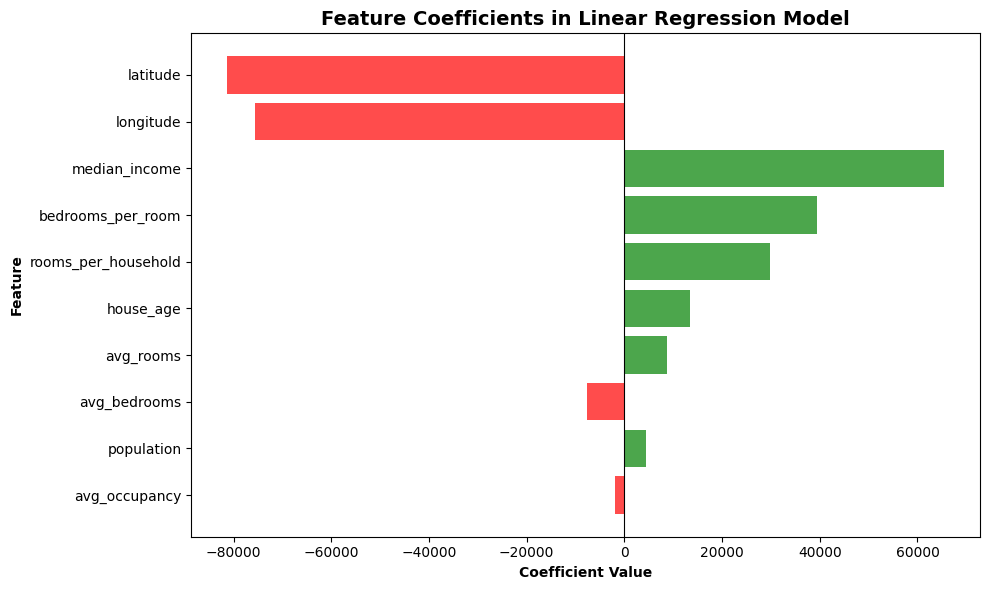


Feature Coefficients (sorted by absolute value):
               Feature   Coefficient
6             latitude -81348.896547
7            longitude -75644.603292
0        median_income  65454.664264
9    bedrooms_per_room  39382.504907
8  rooms_per_household  29749.155906
1            house_age  13499.446903
2            avg_rooms   8743.830702
3         avg_bedrooms  -7756.384547
4           population   4414.497938
5        avg_occupancy  -1971.992702

Positive coefficient = increases price
Negative coefficient = decreases price


In [ ]:
feature_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in feature_coefficients['Coefficient']]
plt.barh(feature_coefficients['Feature'], feature_coefficients['Coefficient'], color=colors, alpha=0.7)
plt.xlabel('Coefficient Value', fontweight='bold')
plt.ylabel('Feature', fontweight='bold')
plt.title('Feature Coefficients in Linear Regression Model', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nFeature Coefficients (sorted by absolute value):")
print(feature_coefficients)
print("\nPositive coefficient = increases price")
print("Negative coefficient = decreases price")

## 8. Predict Visualization

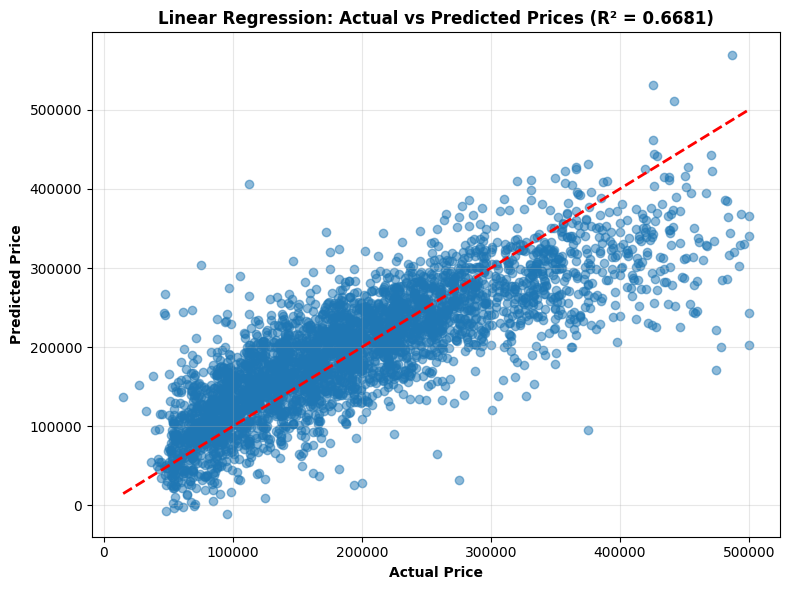

In [119]:
plt.figure(figsize=(8, 6))

# Linear Regression - Actual vs Predicted
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price', fontweight='bold')
plt.ylabel('Predicted Price', fontweight='bold')
plt.title('Linear Regression: Actual vs Predicted Prices (R² = ' + '{:.4f}'.format(lr_r2) + ')', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Residual Analysis


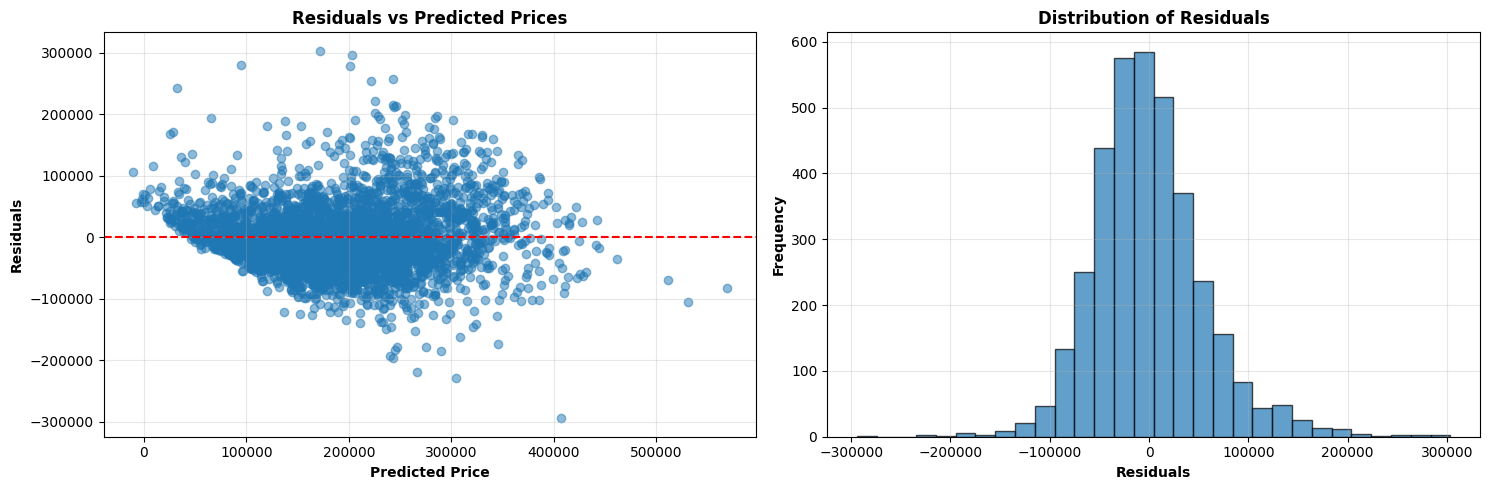

In [125]:
residuals_lr = y_test - y_pred_lr

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].scatter(y_pred_lr, residuals_lr, alpha=0.5)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('Predicted Price', fontweight='bold')
axes[0].set_ylabel('Residuals', fontweight='bold')
axes[0].set_title('Residuals vs Predicted Prices', fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].hist(residuals_lr, bins=30, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Residuals', fontweight='bold')
axes[1].set_ylabel('Frequency', fontweight='bold')
axes[1].set_title('Distribution of Residuals', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Use Trained Model to Predict Future Predictions

In [127]:
new_property = pd.DataFrame({
    'median_income': [8.0],
    'house_age': [15],
    'avg_rooms': [6.5],
    'avg_bedrooms': [3.0],
    'population': [1500],
    'avg_occupancy': [3.2],
    'latitude': [37.8],
    'longitude': [-122.4],
    'rooms_per_household': [6.5/3.2],
    'bedrooms_per_room': [3.0/6.5]
})

new_property_scaled = scaler.transform(new_property)

price_pred_lr = lr_model.predict(new_property_scaled)[0]

print("New Property Details in Bay Area, CA:")
print("  Median Income: $" + "{:,.0f}".format(new_property['median_income'][0] * 10000))
print("  House Age: " + str(new_property['house_age'][0]) + " years")
print("  Average Rooms: " + str(new_property['avg_rooms'][0]))
print("  Average Bedrooms: " + str(new_property['avg_bedrooms'][0]))
print("  Population: " + "{:,}".format(new_property['population'][0]))
print("  Average Occupancy: " + str(new_property['avg_occupancy'][0]))
print("  Location: Lat " + str(new_property['latitude'][0]) + ", Long " + str(new_property['longitude'][0]))
print("  Linear Regression Prediction: $" + "{:,.2f}".format(price_pred_lr))


New Property Details in Bay Area, CA:
  Median Income: $80,000
  House Age: 15 years
  Average Rooms: 6.5
  Average Bedrooms: 3.0
  Population: 1,500
  Average Occupancy: 3.2
  Location: Lat 37.8, Long -122.4
  Linear Regression Prediction: $482,750.81
